In [1]:
import polars as pl
import matplotlib.pyplot as plt
import numpy as np

from IPython.display import display, Latex


In [3]:
df = pl.read_csv("enhanced_student_habits_performance_dataset.csv", null_values=['N/A'])
df.head()

student_id,age,gender,major,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,previous_gpa,semester,stress_level,dropout_risk,social_activity,screen_time,study_environment,access_to_tutoring,family_income_range,parental_support_level,motivation_level,exam_anxiety_score,learning_style,time_management_score,exam_score
i64,i64,str,str,f64,f64,f64,str,f64,f64,str,i64,str,str,f64,str,f64,i64,f64,str,i64,f64,str,str,str,i64,i64,i64,str,f64,i64
100000,26,"""Male""","""Computer Science""",7.645367,3.0,0.1,"""Yes""",70.3,6.2,"""Poor""",3,"""Some College""","""High""",6.0,"""Yes""",4.0,5,5.8,"""No""",0,10.9,"""Co-Learning Group""","""Yes""","""High""",9,7,8,"""Reading""",3.0,100
100001,28,"""Male""","""Arts""",5.7,0.5,0.4,"""No""",88.4,7.2,"""Good""",4,"""PhD""","""Low""",6.8,"""No""",4.0,7,5.8,"""No""",5,8.3,"""Co-Learning Group""","""Yes""","""Low""",7,2,10,"""Reading""",6.0,99
100002,17,"""Male""","""Arts""",2.4,4.2,0.7,"""No""",82.1,9.2,"""Good""",4,"""High School""","""Low""",5.7,"""Yes""",3.79,4,8.0,"""No""",5,8.0,"""Library""","""Yes""","""High""",3,9,6,"""Kinesthetic""",7.6,98
100003,27,"""Other""","""Psychology""",3.4,4.6,2.3,"""Yes""",79.3,4.2,"""Fair""",3,"""Master""","""Medium""",8.5,"""Yes""",4.0,6,4.6,"""No""",3,11.7,"""Co-Learning Group""","""Yes""","""Low""",5,3,10,"""Reading""",3.2,100
100004,25,"""Female""","""Business""",4.7,0.8,2.7,"""Yes""",62.9,6.5,"""Good""",6,"""PhD""","""Low""",9.2,"""No""",4.0,4,5.7,"""No""",2,9.4,"""Quiet Room""","""Yes""","""Medium""",9,1,10,"""Reading""",7.1,98


### Descrição da base
A base é sintética, contém cerca de 80000 linhas e as seguintes colunas:
- `student_id`: Identificador único do estudante.
- `age`: Idade do estudante (16–28).
- `gender`: Masculino, Feminino ou Outro.
- `major`: Área de estudo (por exemplo, Ciência da Computação, Engenharia, Artes).
- `study_hours_per_day`: Média de horas estudadas diariamente.
- `social_media_hours`, netflix_hours, screen_time: Tempo gasto em várias telas.
- `part_time_job`: Se o estudante tem um emprego (Sim/Não).
- `attendance_percentage`: Frequência acadêmica em porcentagem.
- `sleep_hours`, exercise_frequency, diet_quality: Fatores de estilo de vida.
- `mental_health_rating`, stress_level, exam_anxiety_score: Indicadores psicológicos (1–10).
- `extracurricular_participation`, access_to_tutoring: Suporte e engajamento.
- `family_income_range`, parental_support_level, parental_education_level: Antecedentes e suporte.
- `motivation_level`, time_management_score: Habilidades de autogestão (1–10).
- `learning_style`: Método de aprendizagem preferido.
- `study_environment`: Local comum para estudar.
- `dropout_risk`: Sim/Não — derivado dos níveis de estresse e motivação.
- `previous_gpa`: Score da performance acadêmica do estudante.
-`exam_score`: Indicadores de desempenho alvo.

In [4]:
numeric_columns = []
for column in df.columns:
    if df[column].dtype in [pl.Float64, pl.Float32, pl.Int64, pl.Int32, pl.Int16, pl.Int8]:
        numeric_columns.append(column)

print(f"\nColunas numéricas encontradas: {numeric_columns}")


Colunas numéricas encontradas: ['student_id', 'age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours', 'attendance_percentage', 'sleep_hours', 'exercise_frequency', 'mental_health_rating', 'previous_gpa', 'semester', 'stress_level', 'social_activity', 'screen_time', 'parental_support_level', 'motivation_level', 'exam_anxiety_score', 'time_management_score', 'exam_score']


-  Dentre essas variavéis númericas, as seguines colunas não nos interessam para a correlação:
    - `student_id`, `age`,`mental_health_rating`,`semester`,`parental_support_level`

In [5]:
df_numeric = df.select(numeric_columns)
df_dropped = df_numeric.drop(['student_id', 'age','mental_health_rating','semester','parental_support_level'])

### Correlações

In [6]:
df_dropped.null_count() #Não há valores nulos

study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,previous_gpa,stress_level,social_activity,screen_time,motivation_level,exam_anxiety_score,time_management_score,exam_score
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0,0,0,0


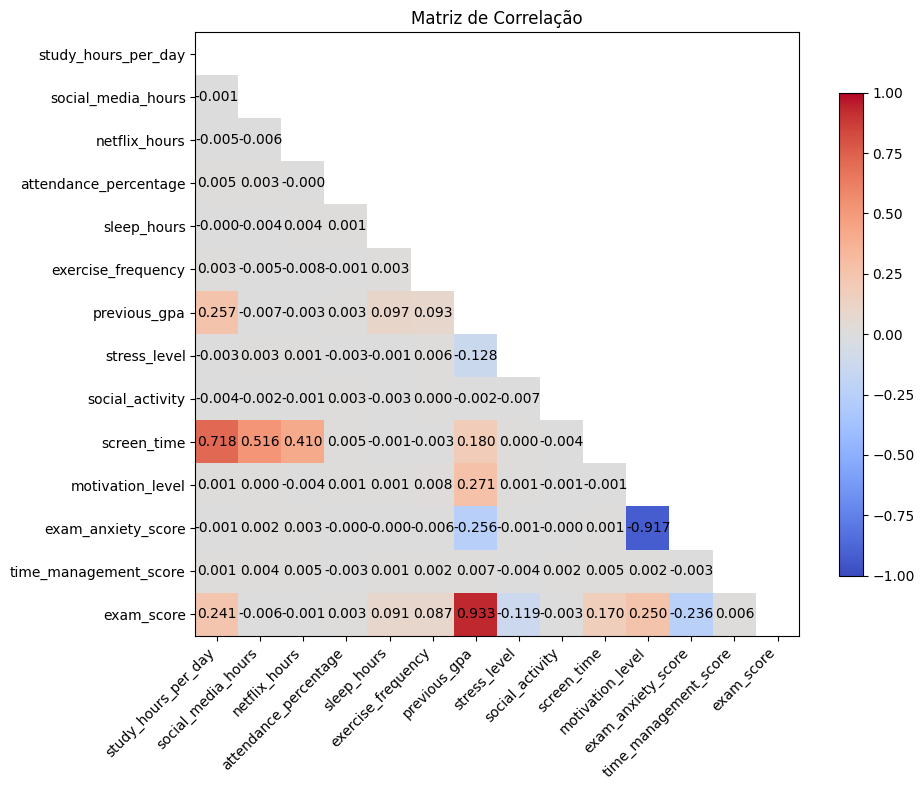

In [7]:
correlation_matrix = df_dropped.corr()
correlation_values = correlation_matrix.to_numpy()
column_names = correlation_matrix.columns

mask = np.triu(np.ones_like(correlation_values, dtype=bool))

correlation_values_masked = correlation_values.copy()
correlation_values_masked[mask] = np.nan

fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(correlation_values_masked, cmap='coolwarm', vmin=-1, vmax=1)

ax.set_xticks(np.arange(len(column_names)))
ax.set_yticks(np.arange(len(column_names)))
ax.set_xticklabels(column_names, rotation=45, ha='right')
ax.set_yticklabels(column_names)


for i in range(len(column_names)):
    for j in range(len(column_names)):
        if not mask[i, j]:  
            text = ax.text(j, i, f'{correlation_values[i, j]:.3f}',
                          ha="center", va="center", color="black")

# Adicionar colorbar
plt.colorbar(im, ax=ax, shrink=0.8)
plt.title('Matriz de Correlação')
plt.tight_layout()
plt.show()
plt.show()

- Pode-se observar que nossa varíavel de objetivo `exam_score` possui forte correlação com `previous_gpa` e a segunda mais forte correlação é com `motivation_level`. Vale ressaltar que `motivation_level` possui correlação com `previous_gpa` de valor semelhante, no entanto todas outras variavéis de correlação mais forte compartilham dessa relação.

### Modelo de regressão
Para criar o modelo vou utilizar o numpy. Vamos utilizar como váriaveis de entrada `previous_gpa` e `study_hours_per_day` e nosso objetivo será, conforme antes, `exam_score`

- Para uma regressão de apenas um regressor temos: $y =\beta0 x_i0 + \varepsilon$
- Extendendo para múltiplos regressores: $y =\beta0 x_i0 + \beta1 x_i1 + \beta2 x_i2 +... \beta p x_ip + \varepsilon$
- Assim podemos representar a regressão com matrizes: $y=\beta x + \varepsilon$

In [49]:
dataset = df_dropped.sample(fraction=1,shuffle=True) # Faz shuffling do dataset

test_size = int(0.2 * len(df_dropped))
test, train = dataset.head(test_size), dataset.tail(-test_size) # Separar em teste e train

x_train = train.select(['previous_gpa', 'study_hours_per_day'])
y_train= train.select('exam_score')

x_test= test.select(['previous_gpa', 'motivation_level'])
y_test= test.select('exam_score')


Para encontrarmos o melhor $\beta$ vamos utilizar a equação normal, que segue conforme:
$$\beta = (X^T X)^-1 X^T Y$$
Essa equação busca calcular o melhor beta sem iterações e possui complexidade de $O(n^3)$. Pode-se também utilizar descida gradiente.

In [ ]:
def normal_equation(X, Y):
    X = np.column_stack([np.ones(X.shape[0]), X]) # Adicionando o intercept
    beta = np.dot((np.linalg.inv(np.dot(X.T,X))), np.dot(X.T,Y))

    return beta
def predict(X_test, beta):
    X_test = np.column_stack([np.ones(X_test.shape[0]), X_test]) # Adicionando o intercept
    return np.dot(X_test, beta)

beta = normal_equation(x_train.to_numpy(), y_train.to_numpy())
with np.printoptions(suppress=True, precision=6):
    print(f"Valores beta (formatado): {beta}")

Valores beta (formatado): [153.175493  -6.323988]


### Com os valores de beta podemos montar a fórmula e gerar previsões:

In [5]:
print("Coeficientes Beta:")
print(f"β₀ (intercept): {beta[0][0]:.6f}")
print(f"β₁ (previous_gpa): {beta[1][0]:.6f}")
print(f"β₂ (motivation_level): {beta[2][0]:.6f}")

print("\nEquação da regressão:")

display(Latex(f"$exam\\_score = {beta[0][0]:.6f} + {beta[1][0]:.6f} * previous\\_gpa + {beta[2][0]:.6f} * study\\_hours\\_per\\_day + \\varepsilon$"))

Coeficientes Beta:


IndexError: invalid index to scalar variable.

### Análise dos resultados

In [57]:
def calculate_errors(y_true, y_pred):

    # Garantir que são arrays numpy 1D
    y_true = np.array(y_true).flatten()
    y_pred = np.array(y_pred).flatten()
    
    # Erro residual (ε = y_true - y_pred)
    residuals = y_true - y_pred
    
   
    
    # Root Mean Squared Error
    mse = np.mean(residuals ** 2)
    rmse = np.sqrt(mse)
    
    # Mean Absolute Error
    mae = np.mean(np.abs(residuals))
    
    # R-squared
    ss_res = np.sum(residuals ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    
    # Mean Absolute Percentage Error
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    
    return {
        'residuals': residuals,
        'mse': mse,
        'rmse': rmse,
        'mae': mae,
        'r2': r2,
        'mape': mape
    }

y_pred = predict(x_test, beta)
errors = calculate_errors(y_test.to_numpy(), y_pred)

print("\nMétricas de Erro:")
print(f"R²: {errors['r2']:.6f}")
print(f"RMSE: {errors['rmse']:.6f}")
print(f"MAE: {errors['mae']:.6f}")
print(f"MAPE: {errors['mape']:.2f}%")

print("\nEstatísticas dos Resíduos (ε):")
print(f"Média: {np.mean(errors['residuals']):.6f}")
print(f"Desvio padrão: {np.std(errors['residuals']):.6f}")
print(f"Min: {np.min(errors['residuals']):.6f}")
print(f"Max: {np.max(errors['residuals']):.6f}")


Métricas de Erro:
R²: 0.870649
RMSE: 4.181495
MAE: 3.197781
MAPE: 3.80%

Estatísticas dos Resíduos (ε):
Média: 0.003277
Desvio padrão: 4.181494
Min: -19.437650
Max: 19.047480


- Aqui podemos ver que com um $R^2$ de $\approx 0.87$ obtivemos um bom resultado, capaz de representar nosso problema bem, as outras métricas de erro suportam isso com seus valores baixos. Podemos também analisar os resíduos.

### Visualização dos resultados:

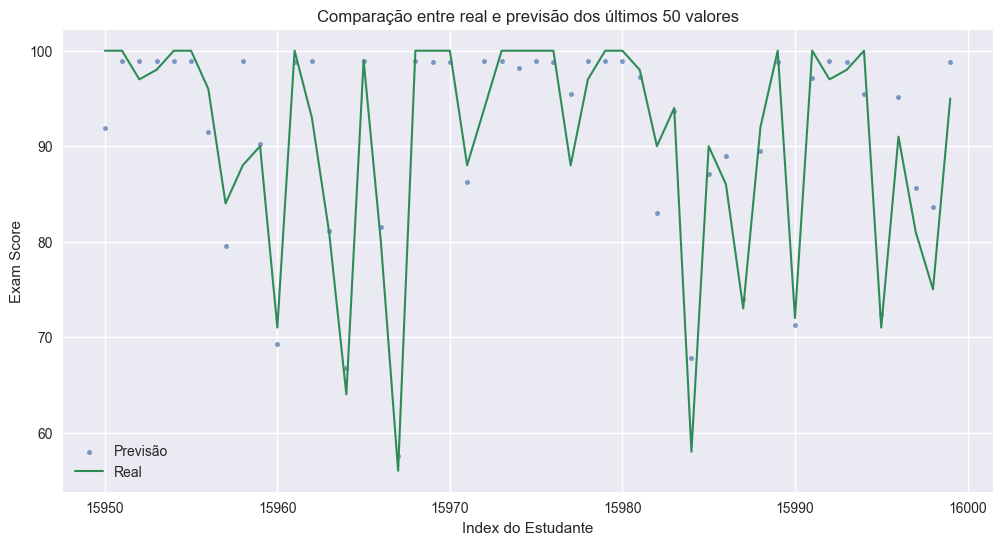

In [ ]:
plt.style.use('seaborn-v0_8')
y_test_numpy = y_test['exam_score'].to_numpy()


indices = np.arange(len(y_test_numpy))

num_points_to_plot = 50 
y_test_numpy_subset = y_test_numpy[-num_points_to_plot:] # Slice from the end
y_pred_subset = y_pred[-num_points_to_plot:] # Slice from the end
indices_subset = indices[-num_points_to_plot:] # Slice from the end

plt.figure(figsize=(12, 6))

plt.scatter(indices_subset, y_pred_subset, label='Previsão', alpha=0.7, s=10) # s is marker size

plt.plot(indices_subset, y_test_numpy_subset, label='Real', color='seagreen', linewidth=1.5)

plt.xlabel('Index do Estudante')
plt.ylabel('Exam Score')
plt.title(f'Comparação entre real e previsão dos últimos {num_points_to_plot} valores') # Updated title
plt.legend()
plt.grid(True)
plt.show()